In [ ]:
'''dataset
https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria
'''


In [1]:

'''Všechny potřebné importy'''

import cv2 #pip install opencv-python
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
from PIL import Image
import os

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


print('načteno úspěšně')



načteno úspěšně


In [2]:
#cesta ke složce, ve které jsou podsložky s obrázky
path = "/home/sanctuary/DATAdrive/Documents/archive/cell_images/"
#název podsložek parasitised=nemoc Uninfected=zdravý
print(os.listdir(path)) # printem otestována správnost cesty


['Uninfected', 'Parasitized']


In [3]:
#do proměnných načteny obrázky

parasitized_cells=os.listdir(f'{path}Parasitized')
uninfected_cells=os.listdir(f'{path}Uninfected')
print('načteno')
#print(parasitized_cells) # vypíše názvy všech obrázků

načteno


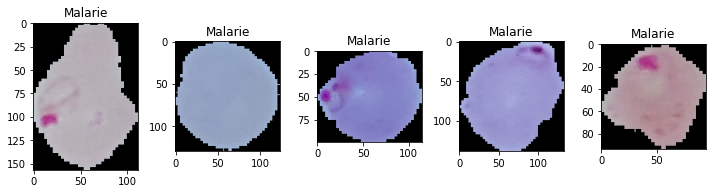

In [4]:

'''ukázání několika nemocných krvinek'''

plt.figure(figsize=(10,10))#velikost  obrázků
range_ = 5
for i in range(range_):
    plt.subplot(1,range_,i+1)
    img=cv2.imread(f'{path}Parasitized/{parasitized_cells[i]}')
    plt.title('Malarie')
    plt.imshow(img)
    plt.tight_layout()
plt.show()
            
    



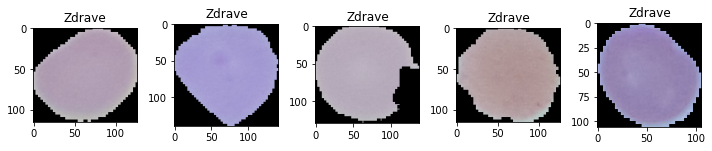

In [5]:
'''ukázání několika zdravých krvinek'''

plt.figure(figsize=(10,10))#velikost  obrázků

for i in range(range_):
    plt.subplot(1,range_,i+1)
    img=cv2.imread(f'{path}Uninfected/{uninfected_cells[i]}')
    plt.title('Zdrave')
    plt.imshow(img)
    plt.tight_layout()
plt.show()

In [6]:
'''úprava dat a rozdělení na testovací a učící'''

generator = ImageDataGenerator(rescale=1/255.0,validation_split=0.2) # scaling 1/255, rozdělení 20 ku 80

train_data = generator.flow_from_directory(
    directory=path, #cesta
    target_size=(50,50), # resize obrázků 50*50 snad stačí
    class_mode='binary',
    batch_size=32, # po kolika půjdou do modelu
    subset='training') #název subsetu

test_data = generator.flow_from_directory(
    directory=path,
    target_size=(50,50),
    class_mode='binary',
    subset='validation')

'''
Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
'''

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


'\nFound 22048 images belonging to 2 classes.\nFound 5510 images belonging to 2 classes.\n'

In [7]:
'''MODEL 1'''


model=Sequential() #sekven4n9 model

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3))) 
#16 neuronů v konvulentní vrstvě
#3*3 poling
#aktivační funkce je relu
#inputshape - obrázky 50*50 * 3  trojka říká že jde o tři rozměry barev = RGB
model.add(MaxPool2D(2,2))
#polling to 2*2
model.add(Conv2D(32,(3,3),activation='relu'))
#další convulentní s dvojnásobným  počtem neuronů
#
#
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
#model do jednoho rozměru

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))
#zahodí 50% neuronů

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

stop=EarlyStopping(monitor='val_loss',patience=2)
#zastaven kvůli overfittingu

history=model.fit_generator(
    generator=train_data, # trenovaci data
    steps_per_epoch=len(train_data), #počet kroků během jedné epochy (32)
    epochs=5, #po4et epoch
    validation_data=test_data, #testovaci data
    validation_steps=len(test_data),#jejich batch (32)
    callbacks=[stop]) #overfitting
'''
Epoch 1/5
689/689 [==============================] - 97s 141ms/step - loss: 0.3575 - accuracy: 0.8304 - val_loss: 0.2268 - val_accuracy: 0.9196
Epoch 2/5
689/689 [==============================] - 20s 29ms/step - loss: 0.1636 - accuracy: 0.9499 - val_loss: 0.1767 - val_accuracy: 0.9368
Epoch 3/5
689/689 [==============================] - 20s 29ms/step - loss: 0.1507 - accuracy: 0.9534 - val_loss: 0.1880 - val_accuracy: 0.9416
Epoch 4/5
689/689 [==============================] - 19s 27ms/step - loss: 0.1420 - accuracy: 0.9569 - val_loss: 0.1633 - val_accuracy: 0.9456
Epoch 5/5
689/689 [==============================] - 19s 27ms/step - loss: 0.1357 - accuracy: 0.9579 - val_loss: 0.1628 - val_accuracy: 0.9450
'''

/home/sanctuary/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/5
689/689 [==============================] - 20s 29ms/step - loss: 0.3325 - accuracy: 0.8508 - val_loss: 0.1654 - val_accuracy: 0.9425
Epoch 2/5
689/689 [==============================] - 20s 29ms/step - loss: 0.1587 - accuracy: 0.9520 - val_loss: 0.1699 - val_accuracy: 0.9396
Epoch 3/5
689/689 [==============================] - 20s 29ms/step - loss: 0.1436 - accuracy: 0.9567 - val_loss: 0.1718 - val_accuracy: 0.9403


'\nEpoch 1/5\n689/689 [==============================] - 97s 141ms/step - loss: 0.3575 - accuracy: 0.8304 - val_loss: 0.2268 - val_accuracy: 0.9196\nEpoch 2/5\n689/689 [==============================] - 20s 29ms/step - loss: 0.1636 - accuracy: 0.9499 - val_loss: 0.1767 - val_accuracy: 0.9368\nEpoch 3/5\n689/689 [==============================] - 20s 29ms/step - loss: 0.1507 - accuracy: 0.9534 - val_loss: 0.1880 - val_accuracy: 0.9416\nEpoch 4/5\n689/689 [==============================] - 19s 27ms/step - loss: 0.1420 - accuracy: 0.9569 - val_loss: 0.1633 - val_accuracy: 0.9456\nEpoch 5/5\n689/689 [==============================] - 19s 27ms/step - loss: 0.1357 - accuracy: 0.9579 - val_loss: 0.1628 - val_accuracy: 0.9450\n'

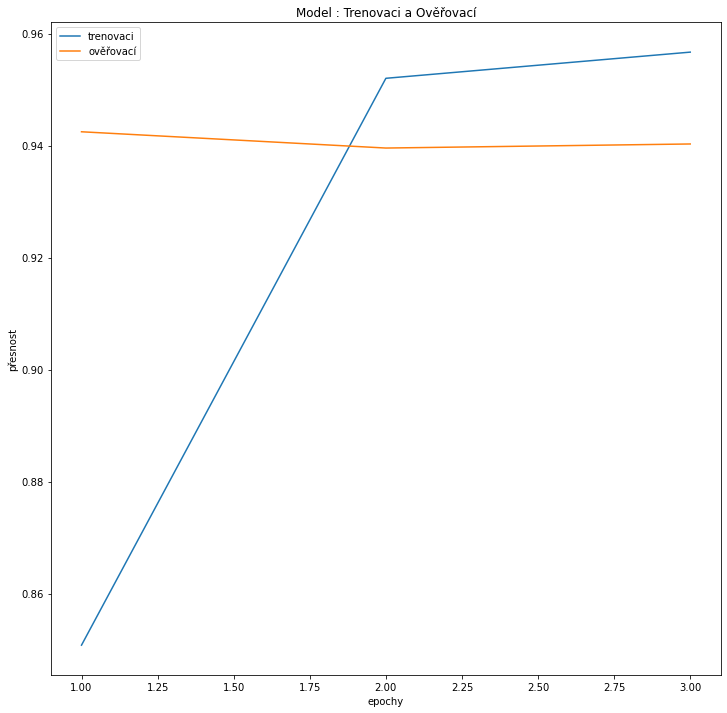

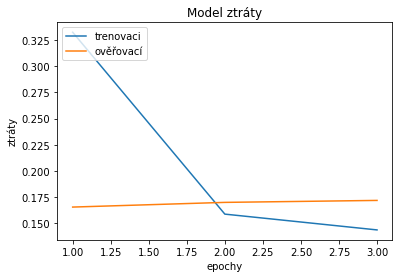

In [10]:
'''Visualizace přesnosti a strátovosti'''
'''Podle grafu dochází ke zlomu ve druh0 generaci, není tedy třetí generace potřeba'''

plt.figure(figsize=(12,12))

epochs=range(1,4) #potřeba upravit podle počtu epoch.. (počet epoch +1)
   
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model : Trenovaci a Ověřovací')
plt.xlabel('epochy')
plt.ylabel('přesnost')
plt.legend(['trenovaci','ověřovací'],loc='upper left')
plt.show()


plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model ztráty')
plt.xlabel('epochy')
plt.ylabel('ztráty')
plt.legend(['trenovaci','ověřovací'],loc='upper left')
plt.show()
    


    
    
    




